**Nama : Muhammad Nurul Mustofa**   
**Kelas : TI 3A**   
**Nim : 22417200222**

# **🚨Tugas**
## **2. Buatlah model CNN untuk klasifikasi dataset MNIST.**

1. Import Library

In [ ]:
# mengimpor TensorFlow untuk membuat dan melatih model neural network.
import tensorflow as tf
# Mengimpor modul layers dan models dari Keras, yang merupakan bagian dari TensorFlow untuk membangun model neural network.
from tensorflow.keras import layers, models
#  Mengimpor dataset MNIST yang berisi gambar digit tulisan tangan.
from tensorflow.keras.datasets import mnist
# Mengimpor fungsi to_categorical untuk melakukan one-hot encoding pada label.
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2. Load Mnist dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalisasi dan Reshape data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 51s 4us/step


3. One-Hot Encoding label

In [ ]:
train_labels = to_categorical(train_labels) # Melakukan one-hot encoding pada label pelatihan.
test_labels = to_categorical(test_labels) # Melakukan one-hot encoding pada label uji

4. Membangun model CNN

In [ ]:
#  Membuat model Sequential, yang berarti kita akan membangun model layer-by-layer secara berurutan.
model = models.Sequential()

# Menambahkan layer konvolusi dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input_shape=(28, 28, 1) yang sesuai dengan dimensi gambar MNIST.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan layer pooling maksimum dengan ukuran pool 2x2 untuk mengurangi dimensi gambar.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan layer flatten untuk meratakan output dari layer sebelumnya menjadi satu dimensi.
model.add(layers.Flatten())
# Menambahkan layer dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU.
model.add(layers.Dense(64, activation='relu'))
# Menambahkan layer output dengan 10 neuron (sesuai jumlah kelas pada MNIST) dan fungsi aktivasi softmax untuk output klasifikasi multikelas.
model.add(layers.Dense(10, activation='softmax'))

d:\Machine Learning\Machine_Learning_2024\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Menampilkan ringkasan model

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

6. Mengompilasi model dengan menggunakan optimizer Adam

In [ ]:
# fungsi loss categorical_crossentropy (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

7.  Melatih model dengan data pelatihan selama 10 epoch, menggunakan data validasi untuk mengukur performa model selama pelatihan.    

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8984 - loss: 0.3352 - val_accuracy: 0.9843 - val_loss: 0.0510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9873 - val_loss: 0.0393
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9893 - val_loss: 0.0356
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9909 - val_loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9896 - val_loss: 0.0368
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9882 - val_loss: 0.0470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9959 - loss: 0

8. Visualisasi akurasi pelatihan dan validasi

313/313 - 1s - 2ms/step - accuracy: 0.9912 - loss: 0.0390


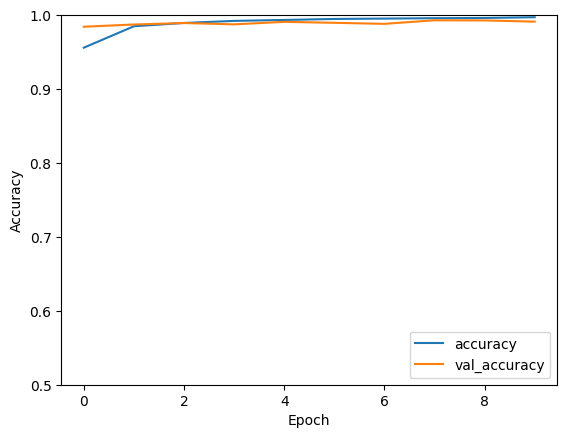

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9911999702453613


9. Fungsi untuk menampilkan contoh hasil prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


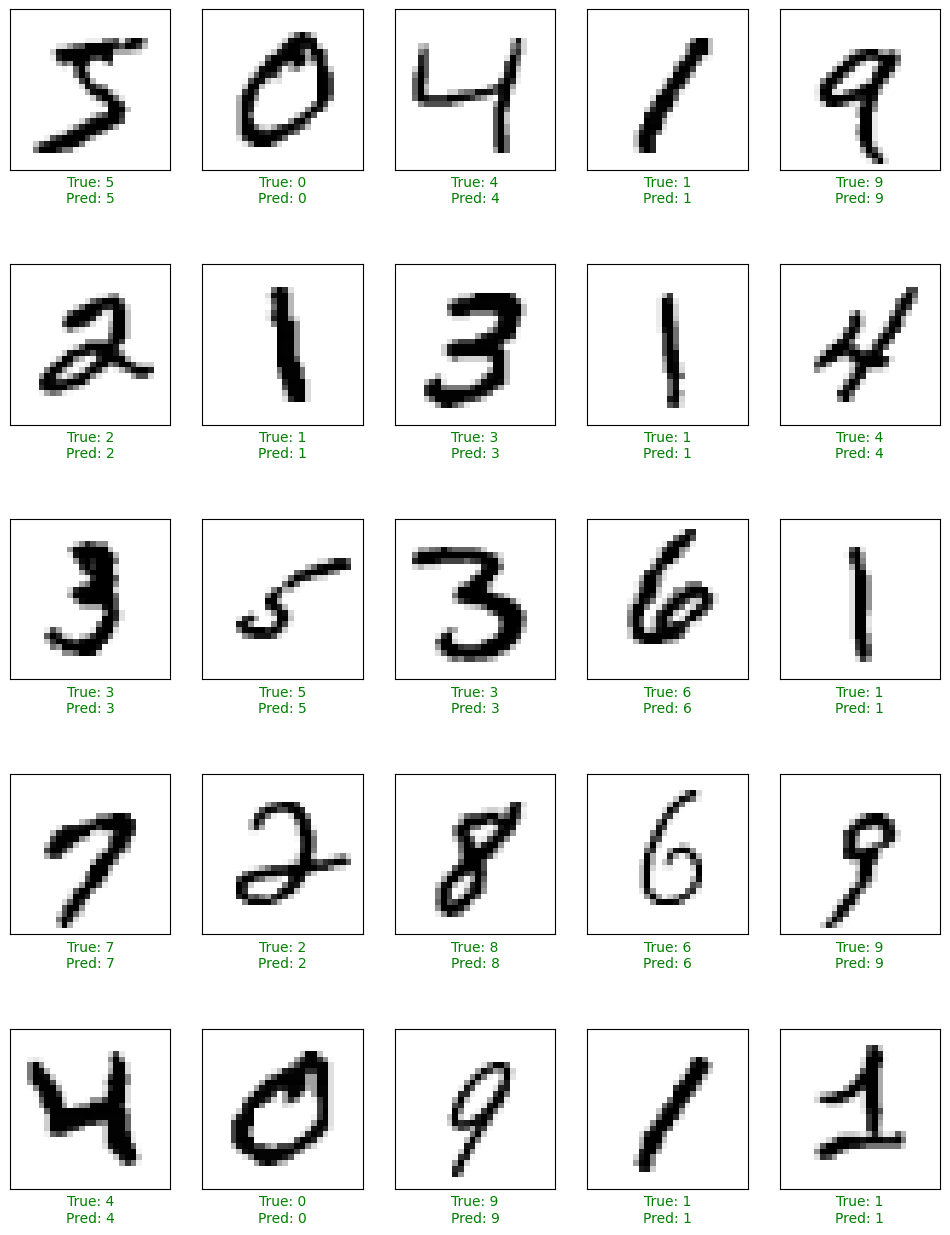

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(images, true_labels, model, class_names, num_samples=25):
    # Menggunakan model untuk melakukan prediksi
    predictions = model.predict(images[:num_samples])

    # Mengubah prediksi menjadi indeks kelas dengan nilai tertinggi
    predicted_labels = np.argmax(predictions, axis=1)

    # Tampilkan hasil prediksi
    plt.figure(figsize=(12, 16))
    for i in range(num_samples):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)

        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if true_label == predicted_label else 'red'
        plt.xlabel(f'True: {true_label}\nPred: {predicted_label}', color=color)

    plt.show()

# Contoh definisi class_names
class_names = [str(i) for i in range(10)]

# Memanggil fungsi untuk menampilkan hasil prediksi pada set pelatihan
visualize_predictions(train_images, np.argmax(train_labels, axis=1), model, class_names)